In [74]:
def single_cluster(x,y,eng):
    x_bins = np.linspace(-150, 150, 50)
    y_bins = np.linspace(-150, 150, 50)
    bin_means = binned_statistic_2d(x, y, eng, statistic='mean',bins=[x_bins, y_bins])
    im = plt.imshow(np.flip(bin_means.statistic.T,0), extent=(-150, 150, -150, 150), aspect='auto')
    #plt.plot([-89.85113525390625, -90.23963928222656], [-15.583617210388184, -16.908479690551758], marker='*', ls='none', ms=20)
    plt.colorbar(im, label='Energy deposite')
    plt.xlabel('EMCal x Position')
    plt.ylabel('EMCal y Position')
    plt.show()

In [41]:
file='/Users/wongdowling/Desktop/n-tuples/aprime_yongbin/Aee_test_eps3.3.root'
a,b,c=dwong.emcal_bytuple(file)

0.02022668346762657
0.01580372452735901
0.008563769049942493
0.007251566741615534
0.057228490710258484
0.0068261888809502125
0.24905727803707123
2.690340757369995
0.014016224071383476
0.008737585507333279
0.022515440359711647
0.3604242503643036
0.008018272928893566
0.017530543729662895
0.012994775548577309
0.026573551818728447
0.0257511418312788
0.039054349064826965
3.679633378982544
0.10069020092487335
0.014320437796413898
0.035593852400779724
0.26720815896987915
0.004551408812403679
0.025404654443264008
0.00816796813160181
0.007598280441015959
0.013626948930323124
0.08482620865106583
0.008834495209157467
0.014692453667521477
0.05832068249583244
0.008330483920872211
0.008144269697368145
0.019504278898239136
0.006848225370049477
0.007729087490588427
0.028189105913043022
0.10874632000923157
0.270131915807724
0.1711852252483368
0.010544566437602043
0.008023547008633614
0.03322978317737579
0.7788482904434204
3.596311092376709
0.5966619253158569
0.11854808777570724
0.08485788106918335
5.02

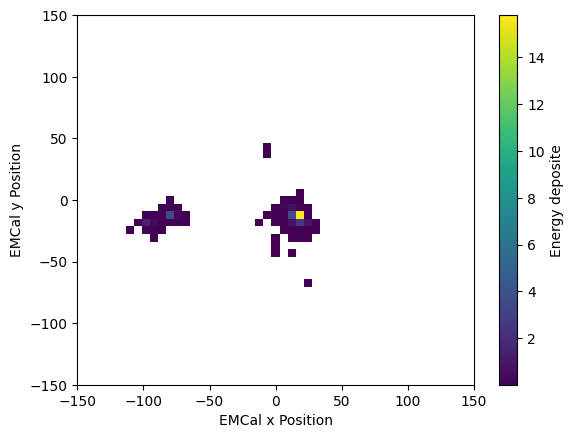

In [75]:
i=133
for item in c[i]:
    print(item)
single_cluster(a[i],b[i],c[i])

In [6]:
import numpy as np

def find_energy_seeds(x, y, energy, min_energy=2, seed_radius=15):
    high_energy_mask = energy > min_energy
    high_energy_points = np.column_stack((x[high_energy_mask], y[high_energy_mask], energy[high_energy_mask]))
    seeds = []
    indices = []

    for i, (x_val, y_val, energy_val) in enumerate(high_energy_points):
        eng_of_cell = energy_val
        distances = np.array(np.sqrt((high_energy_points[:, 0] - x_val)**2 + (high_energy_points[:, 1] - y_val)**2))
        distances[i] = seed_radius + 1
        points_within_radius_mask = distances < seed_radius
        points_within_radius = high_energy_points[points_within_radius_mask]
        if len(points_within_radius) > 0 and eng_of_cell > np.max(points_within_radius[:, 2], initial=0):
            seeds.append((x_val, y_val))
            indices.append(np.where(high_energy_mask)[0][i])
            
    return seeds, indices

In [7]:
def Clustering_multi(file):
    (x, y, eng)=dwong.emcal_bytuple(file)
    labels=[]
    seeds=[]
    labels_decrease=[]
    seed_labels = []
    for i in range(len(eng)):
        (seed, index)=find_energy_seeds(x[i], y[i], eng[i])#number of seeds is just k for kmeans
        seeds.append(seed)
        try:
            points=np.column_stack((x[i],y[i]))
            kmeans = KMeans(n_clusters=len(seed), random_state=0, n_init="auto").fit(points)
            labels.append(kmeans.labels_)
            labels_decrease.append(dwong.label_clus_eng(kmeans.labels_, eng[i]))
            seed_labels.append(kmeans.labels_[index])
        except Exception as e:
            print(f"Error processing event {i}: {e}")
            labels.append([0])
            labels_decrease.append([0])
            seed_labels.append([0]) 
    return x, y, eng, labels, labels_decrease, seeds, seed_labels

In [ ]:
i=133
points = np.column_stack((a[i], b[i], c[i]))
min_energy = 2
seed_radius =  15
larger_energy_seeds = find_energy_seeds(points, min_energy, seed_radius)

print("Larger Energy Seeds:")
for seed in larger_energy_seeds:
    print(seed)

In [12]:
file='/Users/wongdowling/Desktop/n-tuples/aprime_yongbin/Aee_test_eps9.root'
(x, y, eng)=dwong.emcal_bytuple(file)

In [6]:
import time
import dwong
import numpy as np

In [105]:
def find_energy_seeds(x, y, energy, min_energy=2, seed_radius=15):
    high_energy_mask =energy >min_energy
    high_energy_points = np.column_stack((x[high_energy_mask], y[high_energy_mask], energy[high_energy_mask]))
    seeds = []
    indices = []
    for i, (x_val, y_val, energy_val) in enumerate(high_energy_points):
        eng_of_cell = energy_val
        distances = np.array(np.sqrt((high_energy_points[:, 0] - x_val)**2 + (high_energy_points[:, 1] - y_val)**2))
        distances[i] = seed_radius + 1
        points_within_radius_mask = distances < seed_radius
        points_within_radius = high_energy_points[points_within_radius_mask]
        if len(points_within_radius) > 0 and eng_of_cell > np.max(points_within_radius[:, 2], initial=0):
            seeds.append((x_val, y_val))
            indices.append(np.where(high_energy_mask)[0][i])
            
    return seeds, indices

    # Rest of your code...

file='/Users/wongdowling/Desktop/n-tuples/aprime_yongbin/Aee_test_eps3.3.root'
(x, y, eng)=dwong.emcal_bytuple(file)


n=0
min_eng = 2
seed_rad = 15
start_time = time.time()
for i in range(928):
    
    seeds, indices = find_energy_seeds(x[i], y[i], eng[i], min_eng, seed_rad)
    print("Seeds:")
    print(seeds)
    print("Indices:")
    print(indices)
    if len(seeds)>=1:
        n+=1
end_time = time.time()
elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.4f} seconds")
print(n)

Seeds:
[(-78.33999999999999, -39.169999999999995)]
Indices:
[11]
Seeds:
[(-28.569999999999993, -55.76)]
Indices:
[26]
Seeds:
[(-11.97999999999999, 10.600000000000009)]
Indices:
[91]
Seeds:
[(21.200000000000017, -17.049999999999997), (87.56, -17.049999999999997)]
Indices:
[117, 150]
Seeds:
[]
Indices:
[]
Seeds:
[(-23.039999999999992, 5.070000000000007)]
Indices:
[37]
Seeds:
[]
Indices:
[]
Seeds:
[(-17.50999999999999, -39.169999999999995), (-11.97999999999999, 27.190000000000012)]
Indices:
[47, 65]
Seeds:
[]
Indices:
[]
Seeds:
[(37.79000000000002, 54.84)]
Indices:
[39]
Seeds:
[(-11.97999999999999, 21.66000000000001), (48.85000000000002, -0.45999999999999375)]
Indices:
[73, 106]
Seeds:
[(-78.33999999999999, -44.699999999999996)]
Indices:
[10]
Seeds:
[]
Indices:
[]
Seeds:
[]
Indices:
[]
Seeds:
[]
Indices:
[]
Seeds:
[(-100.46, -33.64), (37.79000000000002, 43.78)]
Indices:
[7, 59]
Seeds:
[(-89.39999999999999, -50.23)]
Indices:
[38]
Seeds:
[(15.670000000000016, 16.13000000000001)]
Indices:
[5

In [106]:
n

547

In [50]:
file='/Users/wongdowling/Desktop/n-tuples/aprime_yongbin/Aee_test_eps3.3.root'
(x, y, eng)=dwong.emcal_bytuple(file)

In [85]:
n=0
for i in range(len(eng)):
    mask=eng[i]>0.8
    points=eng[i][mask]
    if len(points)>=2:
        n+=1

In [86]:
n

854

In [87]:
len(eng)

986

In [ ]:
752/651